In [1]:
import numpy as np
import pandas as pd
from liwc import Liwc
from matplotlib import pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
import scipy
import glob
import re
import yaml
import warnings
import nltk
warnings.filterwarnings("ignore")
tqdm.pandas()

import scipy.stats as stats

filepaths = yaml.safe_load(open("../../../config/filepaths.yaml"))

import sys
sys.path.append(filepaths['utils'])
from data import *
from liwc_utils import *
from analisys import *

In [2]:
plt.rcParams['axes.labelsize']  = 14 # fontes no tamanho usado no template
plt.rcParams['axes.titlesize']  = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.family'] = 'serif'
# plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 1.5

plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

---

In [3]:
DATASET = 'youtube' # 'coraal-buckeye' | 'twitter' | 'youtube' | 'interview'

data = load_dataset(DATASET)
data.head(1)

,text,perspective_score,flair_score,textblob_score,vader_score,has_swearing,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,file,group
0,hila won't turn over my classic reviews,0.098707,0.988608,0.351852,0.0,False,0.000843,0.000663,0.007379,bzM2IwhtqQo,White Man


In [4]:
df = data.copy()
df['text'] = df['text'].apply(lambda x: re.sub("[^\w\d'\s]+",'',x))
df['len'] = df.text.str.split(' ').str.len()
df['words'] = df.text.str.split(' ')

---

In [5]:
def count_word(df,word,group): 
    return df[df.group.str.contains(group)].words.apply(lambda x: x.count(word)).sum()

def group_total_words(df,group):
    return df[df.group.str.contains(group)].len.sum()

def contain_word_idx(df,word):
    return df.words.apply(lambda x: word in x)

def calc_word_freq(df,word,group):    
    return count_word(df,word,group) / group_total_words(df,group)

In [6]:
def sequence_ocurences_in_list(sequence,list):
    """
    count the number of times a sequence appears in a list
    """
    i = 0
    count = 0
    while i < len(list):
        if list[i:i+len(sequence)] == sequence:
            count += 1
        i += 1
    return count

def count_sequence(df,sequence,group):
    return df[df.group.str.contains(group)].words.apply(lambda x: sequence_ocurences_in_list(sequence,x)).sum()

def contain_sequence_idx(df,sequence):
    return df.words.apply(lambda x: sequence_ocurences_in_list(sequence,x)) > 0

def calc_sequence_freq(df,sequence,group):    
    return count_sequence(df,sequence,group) / group_total_words(df,group)

def calc_freq(df,x,group):
    if isinstance(x,str):
        return calc_word_freq(df,x,group)
    elif isinstance(x,list):
        return calc_sequence_freq(df,x,group)
    else:
        raise ValueError('x must be a string or a list')

def contain_term_idx(df,term):
    if isinstance(term,str):
        return contain_word_idx(df,term)
    elif isinstance(term,list):
        return contain_sequence_idx(df,term)
    else:
        raise ValueError('term must be a string or a list')

---

# Individual word analysis

## Terms more used by black
Table 5: https://www.jstor.org/stable/pdf/455845.pdf

In [7]:
word = 'bad'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0005404892157793636 148 273826
0.0004260530037423946 310 727609


In [8]:
word = 'bougie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
0.0 0 727609


In [10]:
sequence = ['busting','out']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [11]:
word = 'freak'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.4607816642685501e-05 4 273826
6.871822641006365e-06 5 727609


In [12]:
word = 'fresh'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.208322073141338e-05 17 273826
7.833877810747256e-05 57 727609


In [13]:
word = 'homie'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [14]:
word = 'jones'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

5.8431266570742006e-05 16 273826
4.260530037423946e-05 31 727609


In [15]:
word = 'mondo'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [16]:
word = 'rednecks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


## Terms in section 1.4.1 - (3) Terms for females

In [17]:
word = 'bopper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [18]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [19]:
word = 'honey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.669103737409888e-05 21 273826
8.246187169207637e-06 6 727609


In [20]:
sequence = ['hot','girl']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [21]:
word = 'ma'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
1.374364528201273e-06 1 727609


In [22]:
word = 'shorty'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [23]:
word = 'wifey'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


## Terms in section 1.4.1 - (4) Terms for males

In [24]:
word = 'balla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [25]:
word = 'cat'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.8259770803356875e-05 5 273826
2.6112926035824184e-05 19 727609


In [26]:
word = 'cuz'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0003286758744604238 90 273826
0.00012094407848171201 88 727609


In [27]:
word = 'dawg'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.6519541606713753e-06 1 273826
0.0 0 727609


In [28]:
word = 'dog'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.669103737409888e-05 21 273826
5.497458112805092e-05 40 727609


In [29]:
word = 'fool'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.4607816642685501e-05 4 273826
1.5118009810214002e-05 11 727609


In [30]:
word = 'homes'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.6519541606713753e-06 1 273826
4.1230935846038184e-06 3 727609


In [31]:
word = 'kinfolk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
0.0 0 727609


In [32]:
word = 'mark'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

9.495080817745576e-05 26 273826
0.00010032861055869292 73 727609


In [33]:
word = 'money'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.00011321057898081263 31 273826
0.00010857479772790056 79 727609


In [34]:
word = 'player'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

2.5563679124699628e-05 7 273826
1.0994916225610184e-05 8 727609


In [35]:
word = 'playa'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [36]:
word = 'scrub'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [37]:
word = 'slick'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
8.246187169207637e-06 6 727609


## Terms in section 1.4.1 - (8) Terms for money

In [38]:
word = 'benjis'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [39]:
word = 'benjamins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [40]:
word = 'cabbage'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [41]:
word = 'cheese'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

3.6519541606713753e-06 1 273826
2.748729056402546e-06 2 727609


In [42]:
word = 'cream'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
1.0994916225610184e-05 8 727609


In [43]:
word = 'duckets'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [44]:
word = 'franklins'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [45]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

4.747540408872788e-05 13 273826
2.6112926035824184e-05 19 727609


In [46]:
word = 'scrilla'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


#### Brathwaite (1992) list

In [47]:
word = 'bucks'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


In [48]:
sequence = ['dead','presidents']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [49]:
word = 'dime'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [50]:
word = 'paper'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

4.747540408872788e-05 13 273826
2.6112926035824184e-05 19 727609


In [51]:
sequence = ['cash','money']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [52]:
word = 'dividends'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [53]:
word = 'dough'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
2.748729056402546e-06 2 727609


In [7]:
# word = 'though'
# print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
# print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0005733568032254059 157 273826
0.0006432025991981958 468 727609


In [54]:
word = 'knot'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
1.374364528201273e-06 1 727609


## Terms for leaving (1)

In [55]:
word = 'bounce'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.0955862482014126e-05 3 273826
9.62055169740891e-06 7 727609


In [56]:
sequence = ['push','off']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [57]:
word = 'murk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


##  Terms for expressing or showing envy (2)

In [58]:
sequence = ['playa','hatin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [59]:
word = 'hatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [60]:
word = 'hating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.4607816642685501e-05 4 273826
6.871822641006365e-06 5 727609


In [61]:
sequence = ['hatin','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [62]:
sequence = ['balla','blockin']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


##  Terms for communicating or connecting (3)

In [63]:
word = 'feel'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0016214676473380906 444 273826
0.0014925598776265824 1086 727609


In [64]:
sequence = ["we're",'here']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
5.497458112805092e-06 4 727609


## Terms for making advances toward a member of the opposite sex (4)

In [65]:
sequence = ['push','up','on']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [66]:
sequence = ['get','wit']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [67]:
sequence = ['get','with']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

7.303908321342751e-06 2 273826
4.1230935846038184e-06 3 727609


In [68]:
sequence = ['holler','at','that']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [69]:
word = 'sweatin'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [70]:
word = 'sweating'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

1.0955862482014126e-05 3 273826
1.374364528201273e-06 1 727609


## Terms for labeling that which is good, exciting, etc (5)

In [71]:
sequence = ['off','the','hook']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

3.6519541606713753e-06 1 273826
0.0 0 727609


In [72]:
sequence = ['off','the','chain']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

1.4607816642685501e-05 4 273826
1.374364528201273e-06 1 727609


In [73]:
word = 'krunk'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [74]:
word = 'banging'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [75]:
sequence = ['too','stupid']
print(calc_sequence_freq(df,sequence,'Black'), count_sequence(df,sequence,'Black'), group_total_words(df,'Black'))
print(calc_sequence_freq(df,sequence,'White'), count_sequence(df,sequence,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


## Verbs from sction 3.2.3
https://aclanthology.org/P18-1131/

In [76]:
word = 'wanna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

6.208322073141338e-05 17 273826
1.786673886661655e-05 13 727609


In [77]:
word = 'gotta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0003031121953357241 83 273826
0.0001223184430099133 89 727609


In [78]:
word = 'finna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [79]:
word = 'bouta'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [80]:
word = 'tryna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0 0 273826
0.0 0 727609


In [81]:
word = 'gonna'
print(calc_word_freq(df,word,'Black'), count_word(df,word,'Black'), group_total_words(df,'Black'))
print(calc_word_freq(df,word,'White'), count_word(df,word,'White'), group_total_words(df,'White'))

0.0023993338835610937 657 273826
0.001561278104036646 1136 727609


# All words analysis

In [8]:
terms = [
    # 'bad', 
    'bougie',
    ['busting','out'], 
    'freak', 
    'fresh', 
    'homie', 
    'jones', 
    'mondo',
    'rednecks',
    'bopper',
    'dime',

    'honey',
    ['hot','girl'],
    'ma',
    'shorty',
    'wifey',

    'balla',
    'cat',
    'cuz',
    'dawg',
    'dog',
    'fool',
    'homes',
    'kinfolk',
    'mark',
    'money',
    'player',
    'playa',
    'scrub',
    'slick',

    'benjis',
    'benjamins',
    'benjamin',
    'cabbage',
    'cheese',
    'cream',
    'duckets',
    'franklins',
    'franklin',
    'paper',
    'scrilla',

    'bucks',
    ['dead','presidents'],
    'dime',
    'paper',
    ['cash','money'],
    'dividends',
    'dough',
    'knot',
    'bounce',
    ['push','off'],
    'murk',

    ['playa','hatin'],
    'hatin',
    'hating',
    ['hatin','on'],
    ['balla','blockin'],

    'feel',
    ["we're",'here'],

    ['push','up','on'],
    ['get','wit'],
    ['get','with'],
    ['holler','at','that'],
    'sweatin',

    'sweating',
    ['off','the','hook'],
    ['off','the','chain'],
    'krunk',
    'banging',
    ['too','stupid'],

    'wanna',
    'gotta',
    'finna',
    'bouta',
    'tryna',
    'gonna',
]

In [9]:
black_freq = sum([calc_freq(df,x,'Black') for x in terms])
black_freq

0.002764529299628231

In [10]:
white_freq = sum([calc_freq(df,x,'White') for x in terms])
white_freq

0.0017014632859131758

In [11]:
black_freq/white_freq

1.624795152805491

# Tocixity Analysis

In [86]:
idx = pd.Series()
for term in terms:
    if idx.empty:
        idx = contain_term_idx(df,term)
    else:
        idx = idx | contain_term_idx(df,term)

In [87]:
df_terms = pd.concat([
    df.loc[idx].copy().assign(black_term=True),
    df.loc[~idx].copy().assign(black_term=False)
])
print(idx.sum())
df_terms.head(1)


3880


,text,perspective_score,flair_score,textblob_score,vader_score,has_swearing,detoxify_original_score,detoxify_unbiased_score,detoxify_multilingual_score,file,group,len,words,black_term
34,heavy cuz it's difficult to talk about the thi...,0.107637,0.87973,0.433333,0.063,False,0.000659,0.001065,0.001867,bzM2IwhtqQo,White Man,33,"[heavy, cuz, it's, difficult, to, talk, about,...",True


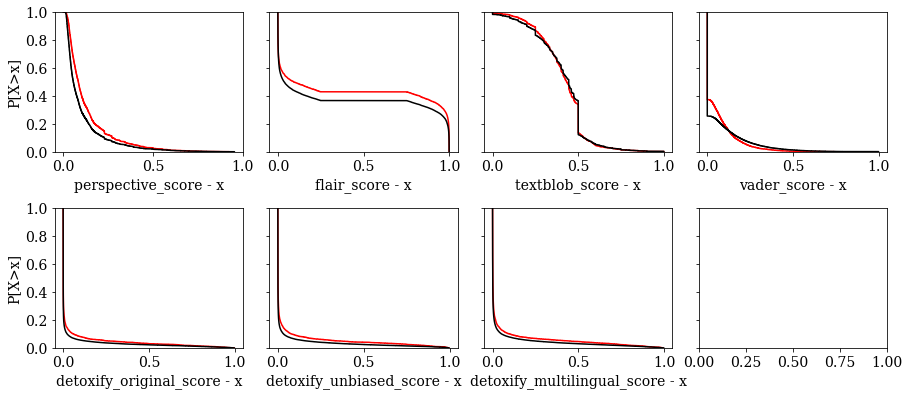

In [88]:
scores = [col for col in df_terms.columns if 'score' in col]

fig, axes = plt.subplots(2, 4, sharey=True, sharex=False, figsize=(12.8,5.6))
axes = axes.ravel()

for i,score in enumerate(scores):
    series_present = df_terms[df_terms.black_term][score]
    series_not_present = df_terms[ ~ df_terms.black_t 